<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [86]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",header= None)

In [87]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,...,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,...,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,-0.530000,-1.020000,-6.260000,-1.410000,-6.210000,-7.430000,-4.420000,-4.420000,-3.450000,-5.050000,-0.730000,-1.840000,-2.480000,-3.690000,-2.280000,-1.500000,0.730000,-1.410000,0.340000,-2.380000,-0.580000,0.680000,-3

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [89]:
data.drop(columns = 0, inplace = True)

In [90]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  non_rated = np.where(new_data == 99)
  new_data[non_rated] = np.NaN
  return new_data, (rated[0][idx], rated[1][idx])


In [95]:
arr = data.values
new_arr , idx = replace(arr, percentage=0.1)
df = pd.DataFrame(new_arr)

In [96]:
df.mean(axis = 0, skipna = True).idxmin()
min(df.mean(axis = 0, skipna = True))

-3.825530351665593

In [97]:
df.mean(axis = 0, skipna = True).idxmax()
max(df.mean(axis = 0, skipna = True))

3.6672373748609477

In [ ]:
data[16779][78]

In [73]:
data.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 100, dtype: int64

In [48]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [49]:
data[17229][59]

KeyError: ignored

In [9]:
arr = data.values
new_arr , idx = replace(arr, percentage=0.1)

In [10]:
new_arr

array([[-7.82,   nan, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [11]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [12]:
latent_item_features.shape[0]

100

In [13]:
latent_user_preferences.shape[0]

24983

In [14]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=23.175094


ValueError: ignored

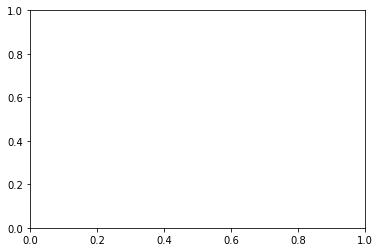

In [19]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [20]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.551e-01, -6.352e-01, -8.636e-01, ...,  2.918e-01, -6.930e-01,
         4.213e-01],
       [ 1.203e+00,  1.144e+00,  1.174e+00, ...,  1.181e+00,  9.669e-01,
         1.422e+00],
       [ 3.984e+00,  3.605e+00,  3.568e+00, ...,  4.307e+00,  2.949e+00,
         5.231e+00],
       ...,
       [ 2.565e-02, -5.220e-03, -2.644e-02, ...,  8.893e-02, -1.998e-02,
         1.140e-01],
       [ 1.128e+00,  1.039e+00,  1.042e+00, ...,  1.180e+00,  8.603e-01,
         1.429e+00],
       [ 1.882e+00,  1.584e+00,  1.478e+00, ...,  2.292e+00,  1.229e+00,
         2.809e+00]])

In [21]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [22]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -0.35507073496291686)","(nan, -0.6352219621970263)","(-9.66, -0.8635661903703291)","(-8.16, -2.1346775263172284)","(-7.52, -0.14080212581654805)","(-8.5, 0.31714093559294815)","(-9.85, -0.891183317119808)","(4.17, -1.0137098199210217)","(-8.98, -1.5634455343742029)","(-4.76, -0.1025316423778582)","(-8.5, 0.4111036176743877)","(-6.75, 0.32263407756694046)","(-7.18, -2.0435257112196212)","(8.45, 0.2857649660532428)","(nan, -2.079299581612556)","(-7.52, -3.19440397243236)","(-7.43, -1.2952832681396869)","(-9.81, -1.0632321853174007)","(nan, -0.650210049072203)","(nan, -1.6998610479882614)","(-9.37, 0.9364572032865723)","(nan, -0.3638910460847731)","(-4.37, -1.1264417197642793)","(-9.81, -2.512602101163531)","(-8.5, -0.790700288331224)","(1.12, 0.10512371331364116)","(7.82, 2.019747546319674)","(2.86, 0.32168546731379594)","(9.13, 1.9095710544366997)","(-7.43, -1.6239749278674775)","(2.14, 1.1020689894462443)","(nan, 1.9806103574898746)","(nan, -2.2687676212874233)","(7.82, -0.18096605645278574)","(5.05, 1.9548982236829147)","(4.95, 2.1040241418926193)","(-9.17, -2.182031363882429)","(-8.4, -0.0530230316453582)","(-8.4, -0.10414959613986871)","(-8.4, -0.2185345724154131)",...,"(8.59, 1.1477202473198886)","(3.59, 1.66163368994596)","(-6.84, -1.0405912510634217)","(-9.03, -1.8656675834049299)","(2.82, 1.1504819183908792)","(-1.36, 1.4341034930281678)","(-9.08, -2.1400364937156318)","(8.3, 1.326922983685287)","(nan, 1.5273823992732711)","(nan, -0.8708745512302589)","(nan, -0.7814125800813806)","(nan, 1.8608139009404703)","(nan, 0.5606125460182083)","(nan, -1.536041263165148)","(nan, -0.5403501825458218)","(nan, 1.6858369454006132)","(nan, 0.3562168712233277)","(-9.42, 0.9763107751978299)","(nan, -0.32504821642070075)","(nan, 0.6770299241971208)","(nan, 1.0587581519527716)","(-7.72, 0.2705068466323625)","(nan, 1.2818332772470185)","(nan, 0.011810214193141572)","(nan, 0.1512674189113168)","(nan, -0.25722963231205953)","(nan, 0.9959967433757054)","(nan, 1.0179308101376998)","(nan, 2.4700814712198333)","(nan, 0.07565430565991971)","(2.82, 1.0070801561565588)","(nan, 0.30257780272655577)","(nan, 1.4176455723398536)","(nan, 0.14424810780378947)","(nan, 0.2608653134374992)","(nan, 0.6001884049912826)","(-5.63, 0.7447217939314926)","(nan, 0.29181707220376957)","(nan, -0.6930368152632596)","(nan, 0.42126964254827826)"
1,"(4.08, 1.2030684035170718)","(-0.29, 1.1444748725804161)","(6.36, 1.1743519599504684)","(4.37, 0.7327722919202801)","(-2.38, 0.8824307960357233)","(-9.66, 1.6776343196550423)","(-0.73, 0.5829382046474878)","(-5.34, 0.29469496483119456)","(8.88, 0.8931038480553353)","(9.22, 1.3053603415672166)","(6.75, 1.660948247857597)","(8.64, 1.691047442927793)","(nan, 0.08679077027375305)","(7.43, 1.7071471360299233)","(4.56, -0.015852970802344775)","(nan, -0.39078150031719283)","(4.66, 0.29978392542978477)","(-0.68, 0.4061770295669809)","(3.3, 0.9248084015844773)","(-1.21, 0.7185785694175185)","(0.87, 1.7910245095465218)","(nan, 1.459252847963362)","(8.35, 1.201805494310491)","(9.17, 0.5830827163570533)","(0.05, 1.3812788738892987)","(7.57, 1.6728202395425855)","(4.71, 1.8221921299114823)","(0.87, 1.607107096734925)","(-0.39, 1.7317127962076535)","(6.99, 1.1762317339755028)","(6.5, 1.7536254915406593)","(-0.92, 1.8213999878144806)","(7.14, 0.8013826988028272)","(9.03, 1.5085492197931578)","(-1.8, 1.7924469196560886)","(0.73, 1.7740670142119346)","(nan, 0.5948455606099322)","(3.4, 1.4594849561687622)","(-0.87, 1.617616968937195)","(7.91, 1.5082822305819443)",...,"(-6.7, 1.8773567814454786)","(-3.35, 1.8806433206386732)","(-9.03, 1.329287040274942)","(4.47, 0.8817053020939564)","(4.08, 1.7791264886810425)","(-3.83, 1.7410654244641657)","(8.74, 0.9662900089210652)","(1.12, 1.791076790650771)","(0.

In [31]:
df_Items = pd.read_excel("movies_latent_factors.xlsx", sheet_name='Items')
df_Items.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [32]:
id = df_Items['Factor10'].argmax()

In [33]:
df_Items.head(id + 1)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,752,V for Vendetta (2006),-0.642504,0.432674,0.322241,-0.335012,0.230943,-0.618309,0.335841,-0.954064,-0.932023,0.735602,-0.129665,-1.126355,2.014107,-0.279514,1.460253
62,786,Almost Famous (2000),0.640685,1.199326,0.270392,0.371095,0.479752,-0.144391,-0.752597,-0.563700,0.439893,0.267137,-0.242001,0.033085,-0.309858,0.005433,0.256299
63,788,Mrs. Doubtfire (1993),1.952558,0.314091,-1.029966,1.004276,0.853951,0.671413,-0.192968,0.048769,0.399648,0.905301,0.309326,0.335412,0.276849,-0.517637,0.280978
64,807,Seven (a.k.a. Se7en) (1995),-1.261114,1.419946,-0.118211,-0.479119,0.205107,-0.416039,0.205585,-0.697883,-0.360988,-0.246101,0.407891,0.276333,0.741695,-0.597342,0.179386


In [34]:
df_Users = pd.read_excel("movies_latent_factors.xlsx", sheet_name='Users')
df_Users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [103]:
user_factors= df_Users[(df_Users["User"] == 174)]
user_factors = user_factors.drop('User', axis=1)
user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
3,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.09589,-0.082396,0.036767,-0.165438,0.050692


In [104]:
movie_factors = df_Items[(df_Items["Movie ID"] == 808)]
movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
movie_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
65,-0.241581,-0.449723,0.039779,2.286099,-1.163009,-0.295425,0.905854,0.448446,-2.016609,1.546593,0.513526,0.666029,-0.743928,-0.555847,-0.941293


In [105]:
user_factors.values.dot(movie_factors.values.T)

array([[0.559]])

In [109]:
user_factors= df_Users[(df_Users["User"] == 2848)]
user_factors = user_factors.drop('User', axis=1)
user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
13,-0.113283,-0.098942,-0.040393,0.04218,-0.041068,-0.039568,0.018291,-0.191254,0.218912,0.017262,-0.087468,0.036894,0.067105,-0.01678,-0.029503


In [108]:
movie_ids = [603, 5503, 786, 238, 812, 1892,1891]
ratings = {}
for id in movie_ids:
  movie_factors = df_Items[(df_Items["Movie ID"] == id)]
  movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
  ratings[id] = user_factors.values.dot(movie_factors.values.T)
ratings

{238: array([[-0.049]]),
 603: array([[1.052]]),
 786: array([[-0.23]]),
 812: array([[-0.003]]),
 1891: array([[0.91]]),
 1892: array([[0.885]]),
 5503: array([[0.098]])}

In [110]:
movie_ids = [155, 120, 122, 671, 3049, 2501,424]
ratings = {}
for id in movie_ids:
  movie_factors = df_Items[(df_Items["Movie ID"] == id)]
  movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
  ratings[id] = user_factors.values.dot(movie_factors.values.T)
ratings

{120: array([[0.788]]),
 122: array([[0.844]]),
 155: array([[1.007]]),
 424: array([[0.098]]),
 671: array([[-0.143]]),
 2501: array([[0.305]]),
 3049: array([[-0.411]])}

array([], shape=(1, 0), dtype=float64)